## Our Project - Analyzing Baseball Games from 2016

#### The purpose of this project was twofold: first, to determine the effect of external factors (temperature, wind speed, crowd size, etc...) on "internal" components of a baseball game. (game duration, runs scored, etc..). Finally, using the Kaggle dataset and Scikit-Learn, various machine learning models were implemented to predict the winner of the baseball game. This project was done as a part of the Cornell Sports Analytics Club during the Fall 2021 semester and served as an interesting application of data science and machine learning for us.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\joshu\Downloads\batting.csv\baseball_reference_2016_clean_updated_2.csv')

### A Snippet Of Data

In [22]:
df.head()

,Unnamed: 0,attendance,away_team_errors,away_team_hits,away_team_runs,field_type,game_type,home_team_errors,home_team_hits,home_team_runs,elevation,temperature,wind_speed,total_runs,game_hours_dec,home_team_win
0,0,40030.0,1,7,3,0,0,0,9,4,856,74,14,7,3.216667,1
1,1,21621.0,0,5,2,0,0,0,8,3,535,55,24,5,2.383333,1
2,2,12622.0,0,5,2,0,0,0,9,4,33,48,7,6,3.183333,1
3,3,18531.0,0,8,3,0,0,1,8,1,1001,65,10,4,2.883333,0
4,4,18572.0,1,8,4,0,1,0,8,3,1086,77,0,7,2.650000,0


In [23]:
pd.set_option('display.max_rows', None)

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

### Data Exploration/Manipulation

In [5]:
df['total_hits'] = df['home_team_hits'] + df['away_team_hits']

In [10]:
df.head()

,attendance,away_team_errors,away_team_hits,away_team_runs,field_type,game_type,home_team_errors,home_team_hits,home_team_runs,elevation,temperature,wind_speed,total_runs,game_hours_dec,home_team_win
0,40030.0,1,7,3,0,0,0,9,4,856,74,14,7,3.216667,1
1,21621.0,0,5,2,0,0,0,8,3,535,55,24,5,2.383333,1
2,12622.0,0,5,2,0,0,0,9,4,33,48,7,6,3.183333,1
3,18531.0,0,8,3,0,0,1,8,1,1001,65,10,4,2.883333,0
4,18572.0,1,8,4,0,1,0,8,3,1086,77,0,7,2.650000,0


In [26]:
df.corr()

,attendance,away_team_errors,away_team_hits,away_team_runs,field_type,game_type,home_team_errors,home_team_hits,home_team_runs,elevation,temperature,wind_speed,total_runs,game_hours_dec,home_team_win,total_hits
attendance,1.000000,0.022766,-0.040551,-0.040285,-0.024012,0.121680,-0.017343,-0.001118,0.022417,0.012435,0.038157,0.165820,-0.012348,0.060845,0.045631,-0.028191
away_team_errors,0.022766,1.000000,0.033057,0.042442,-0.014168,-0.009724,0.024280,0.153876,0.218470,0.029310,0.014171,0.044275,0.181135,0.120013,0.095273,0.124352
away_team_hits,-0.040551,0.033057,1.000000,0.780760,-0.030669,-0.019477,0.190945,0.114150,0.052616,0.107004,0.050767,0.021277,0.577550,0.461063,-0.436948,0.752712
away_team_runs,-0.040285,0.042442,0.780760,1.000000,-0.010454,-0.017202,0.280002,0.091607,0.038996,0.118213,0.053931,0.019425,0.720009,0.381505,-0.567761,0.589333
field_type,-0.024012,-0.014168,-0.030669,-0.010454,1.000000,0.030443,-0.017727,-0.035332,-0.010792,-0.107605,-0.049262,-0.221287,-0.014738,-0.050437,-0.011052,-0.044179
game_type,0.121680,-0.009724,-0.019477,-0.017202,0.030443,1.000000,0.012803,0.010128,-0.000065,0.012445,-0.010190,0.015879,-0.011965,0.013299,0.006917,-0.006476
home_team_errors,-0.017343,0.024280,0.190945,0.280002,-0.017727,0.012803,1.000000,-0.007762,-0.008251,0.054625,0.026743,0.040971,0.188291,0.152338,-0.172685,0.124139
home_team_hits,-0.001118,0.153876,0.114150,0.091607,-0.035332,0.010128,-0.007762,1.000000,0.769776,0.124320,0.084073,0.060636,0.598080,0.341406,0.376889,0.739968
home_team_runs,0.022417,0.218470,0.052616,0.038996,-0.010792,-0.000065,-0.008251,0.769776,1.000000,0.113232,0.063742,0.068147,0.721514,0.208932,0.537674,0.545740
elevation,0.012435,0.029310,0.107004,0.118213,-0.107605,0.012445,0.054625,0.124320,0.113232,1.000000,0.110651,-0.018041,0.160552,0.071379,-0.012323,0.154834


### Data Visualization

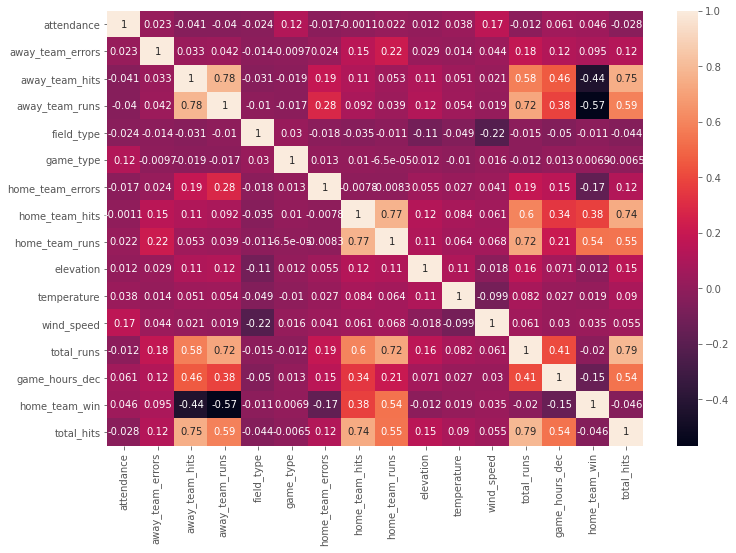

In [27]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [28]:
x = df['temperature']
y = df['total_runs']

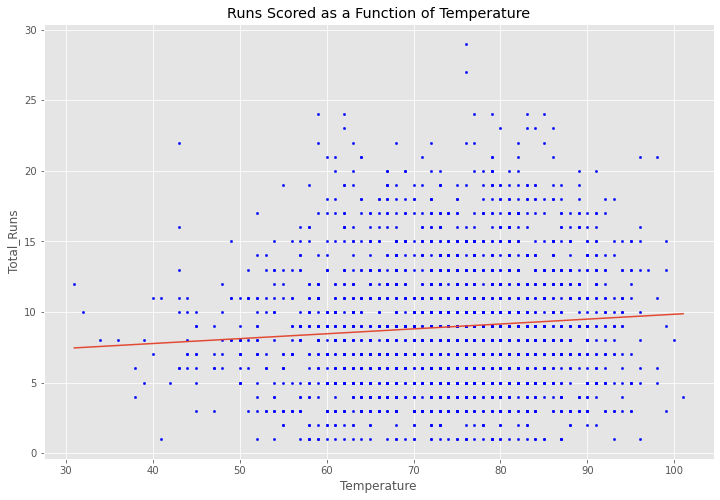

In [29]:
plt.scatter(x, y, color = 'blue', s = 5)
plt.xlabel('Temperature')
plt.ylabel('Total_Runs')
plt.title('Runs Scored as a Function of Temperature')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

In [69]:
df['run_difference'] = df['home_team_runs'] - df['away_team_runs']

In [31]:
df.corr()

,attendance,away_team_errors,away_team_hits,away_team_runs,field_type,game_type,home_team_errors,home_team_hits,home_team_runs,elevation,temperature,wind_speed,total_runs,game_hours_dec,home_team_win,total_hits,run_difference
attendance,1.000000,0.022766,-0.040551,-0.040285,-0.024012,0.121680,-0.017343,-0.001118,0.022417,0.012435,0.038157,0.165820,-0.012348,0.060845,0.045631,-0.028191,0.045200
away_team_errors,0.022766,1.000000,0.033057,0.042442,-0.014168,-0.009724,0.024280,0.153876,0.218470,0.029310,0.014171,0.044275,0.181135,0.120013,0.095273,0.124352,0.127183
away_team_hits,-0.040551,0.033057,1.000000,0.780760,-0.030669,-0.019477,0.190945,0.114150,0.052616,0.107004,0.050767,0.021277,0.577550,0.461063,-0.436948,0.752712,-0.524539
away_team_runs,-0.040285,0.042442,0.780760,1.000000,-0.010454,-0.017202,0.280002,0.091607,0.038996,0.118213,0.053931,0.019425,0.720009,0.381505,-0.567761,0.589333,-0.692336
field_type,-0.024012,-0.014168,-0.030669,-0.010454,1.000000,0.030443,-0.017727,-0.035332,-0.010792,-0.107605,-0.049262,-0.221287,-0.014738,-0.050437,-0.011052,-0.044179,-0.000261
game_type,0.121680,-0.009724,-0.019477,-0.017202,0.030443,1.000000,0.012803,0.010128,-0.000065,0.012445,-0.010190,0.015879,-0.011965,0.013299,0.006917,-0.006476,0.012347
home_team_errors,-0.017343,0.024280,0.190945,0.280002,-0.017727,0.012803,1.000000,-0.007762,-0.008251,0.054625,0.026743,0.040971,0.188291,0.152338,-0.172685,0.124139,-0.207698
home_team_hits,-0.001118,0.153876,0.114150,0.091607,-0.035332,0.010128,-0.007762,1.000000,0.769776,0.124320,0.084073,0.060636,0.598080,0.341406,0.376889,0.739968,0.489871
home_team_runs,0.022417,0.218470,0.052616,0.038996,-0.010792,-0.000065,-0.008251,0.769776,1.000000,0.113232,0.063742,0.068147,0.721514,0.208932,0.537674,0.545740,0.694028
elevation,0.012435,0.029310,0.107004,0.118213,-0.107605,0.012445,0.054625,0.124320,0.113232,1.000000,0.110651,-0.018041,0.160552,0.071379,-0.012323,0.154834,-0.003405


In [32]:
df['hit-run-ratio'] = df['home_team_hits']/df['home_team_runs'] #higer ratio signifies more singles/less XBH

In [33]:
df.corr()

,attendance,away_team_errors,away_team_hits,away_team_runs,field_type,game_type,home_team_errors,home_team_hits,home_team_runs,elevation,temperature,wind_speed,total_runs,game_hours_dec,home_team_win,total_hits,run_difference,hit-run-ratio
attendance,1.000000,0.022766,-0.040551,-0.040285,-0.024012,0.121680,-0.017343,-0.001118,0.022417,0.012435,0.038157,0.165820,-0.012348,0.060845,0.045631,-0.028191,0.045200,-0.017847
away_team_errors,0.022766,1.000000,0.033057,0.042442,-0.014168,-0.009724,0.024280,0.153876,0.218470,0.029310,0.014171,0.044275,0.181135,0.120013,0.095273,0.124352,0.127183,-0.140820
away_team_hits,-0.040551,0.033057,1.000000,0.780760,-0.030669,-0.019477,0.190945,0.114150,0.052616,0.107004,0.050767,0.021277,0.577550,0.461063,-0.436948,0.752712,-0.524539,-0.000369
away_team_runs,-0.040285,0.042442,0.780760,1.000000,-0.010454,-0.017202,0.280002,0.091607,0.038996,0.118213,0.053931,0.019425,0.720009,0.381505,-0.567761,0.589333,-0.692336,0.000301
field_type,-0.024012,-0.014168,-0.030669,-0.010454,1.000000,0.030443,-0.017727,-0.035332,-0.010792,-0.107605,-0.049262,-0.221287,-0.014738,-0.050437,-0.011052,-0.044179,-0.000261,0.004360
game_type,0.121680,-0.009724,-0.019477,-0.017202,0.030443,1.000000,0.012803,0.010128,-0.000065,0.012445,-0.010190,0.015879,-0.011965,0.013299,0.006917,-0.006476,0.012347,0.012784
home_team_errors,-0.017343,0.024280,0.190945,0.280002,-0.017727,0.012803,1.000000,-0.007762,-0.008251,0.054625,0.026743,0.040971,0.188291,0.152338,-0.172685,0.124139,-0.207698,0.003428
home_team_hits,-0.001118,0.153876,0.114150,0.091607,-0.035332,0.010128,-0.007762,1.000000,0.769776,0.124320,0.084073,0.060636,0.598080,0.341406,0.376889,0.739968,0.489871,-0.188313
home_team_runs,0.022417,0.218470,0.052616,0.038996,-0.010792,-0.000065,-0.008251,0.769776,1.000000,0.113232,0.063742,0.068147,0.721514,0.208932,0.537674,0.545740,0.694028,-0.620934
elevation,0.012435,0.029310,0.107004,0.118213,-0.107605,0.012445,0.054625,0.124320,0.113232,1.000000,0.110651,-0.018041,0.160552,0.071379,-0.012323,0.154834,-0.003405,-0.049396


In [34]:
df.drop('game_type', axis = 1, inplace = True)

In [35]:
df.drop('field_type', axis = 1, inplace = True)

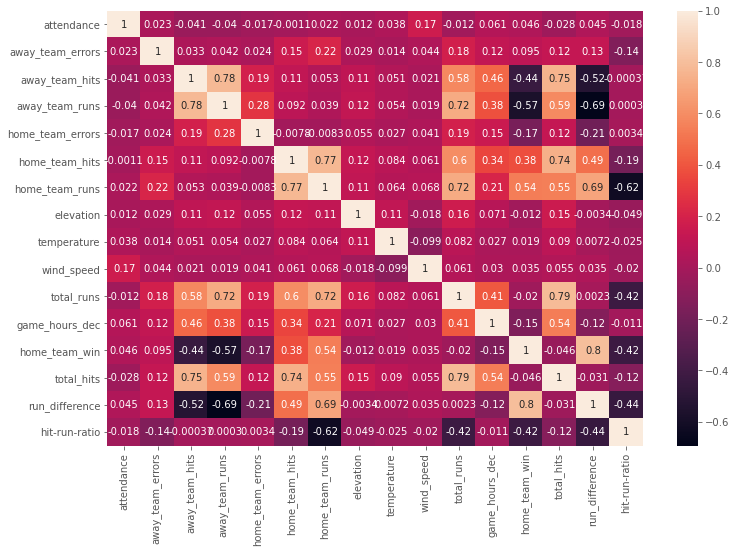

In [36]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [13]:
df.drop('away_team_errors', axis = 1, inplace = True)

In [14]:
df.drop('home_team_errors', axis = 1, inplace = True)

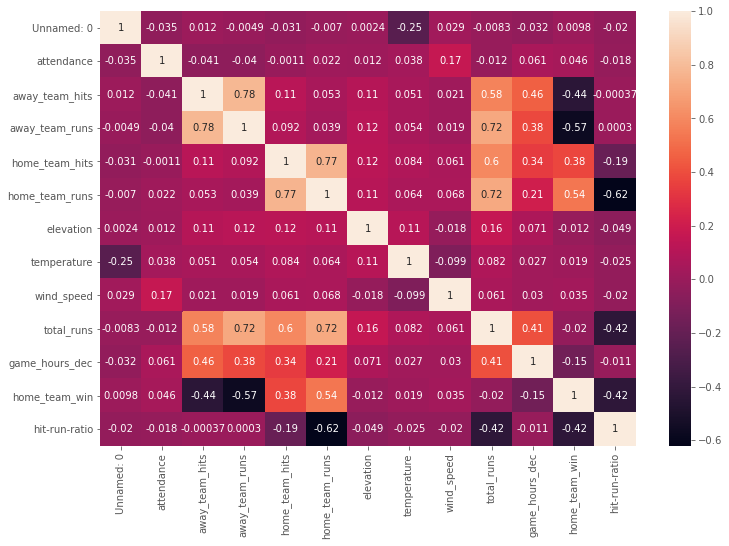

In [16]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [63]:
x = df['attendance']
y = df['wind_speed']

In [66]:
x = df['attendance']
y = df['game_hours_dec']

LinAlgError: SVD did not converge in Linear Least Squares

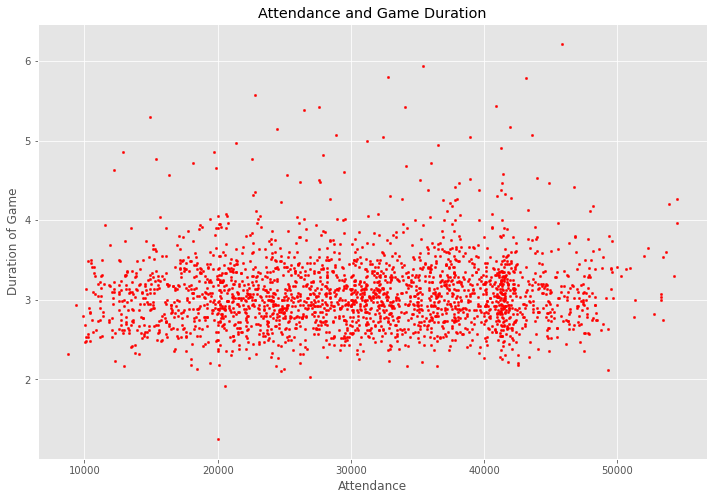

In [68]:
plt.scatter(x, y, color = 'red', s = 5)
plt.xlabel('Attendance')
plt.ylabel('Duration of Game')
plt.title('Attendance and Game Duration')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

In [70]:
x = df['run_difference']
y = df['game_hours_dec']

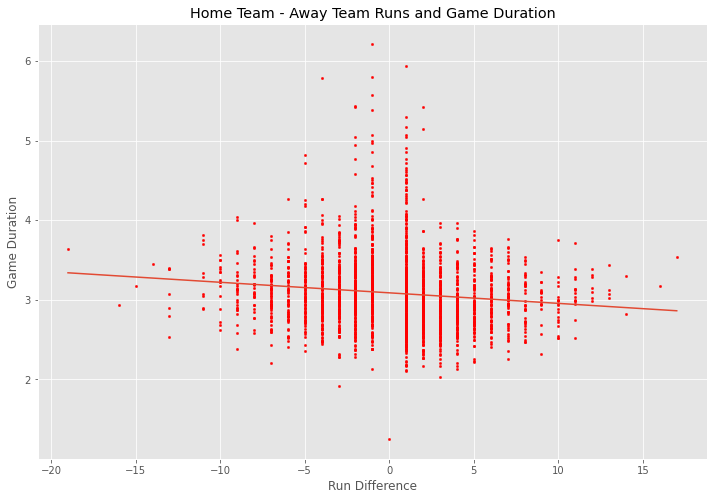

In [72]:
plt.scatter(x, y, color = 'red', s = 5)
plt.xlabel('Run Difference')
plt.ylabel('Game Duration')
plt.title('Home Team - Away Team Runs and Game Duration')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

In [11]:
df.head()

,attendance,away_team_errors,away_team_hits,away_team_runs,field_type,game_type,home_team_errors,home_team_hits,home_team_runs,elevation,temperature,wind_speed,total_runs,game_hours_dec,home_team_win
0,40030.0,1,7,3,0,0,0,9,4,856,74,14,7,3.216667,1
1,21621.0,0,5,2,0,0,0,8,3,535,55,24,5,2.383333,1
2,12622.0,0,5,2,0,0,0,9,4,33,48,7,6,3.183333,1
3,18531.0,0,8,3,0,0,1,8,1,1001,65,10,4,2.883333,0
4,18572.0,1,8,4,0,1,0,8,3,1086,77,0,7,2.650000,0


In [12]:
df.drop('home_team_runs', axis=1, inplace=True)

In [13]:
df

,attendance,away_team_errors,away_team_hits,away_team_runs,field_type,game_type,home_team_errors,home_team_hits,elevation,temperature,wind_speed,total_runs,game_hours_dec,home_team_win
0,40030.0,1,7,3,0,0,0,9,856,74,14,7,3.216667,1
1,21621.0,0,5,2,0,0,0,8,535,55,24,5,2.383333,1
2,12622.0,0,5,2,0,0,0,9,33,48,7,6,3.183333,1
3,18531.0,0,8,3,0,0,1,8,1001,65,10,4,2.883333,0
4,18572.0,1,8,4,0,1,0,8,1086,77,0,7,2.650000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,31042.0,2,7,5,1,1,1,7,15,72,0,8,2.850000,0
2459,39500.0,0,5,1,0,1,1,9,780,39,14,5,3.033333,1
2460,20098.0,0,6,3,0,1,2,9,597,66,0,7,3.316667,1
2461,17883.0,0,13,7,0,1,1,10,10,71,0,10,3.366667,0


In [14]:
df.drop('away_team_runs', axis=1, inplace=True)

In [15]:
df['hit difference'] = df['home_team_hits'] - df['away_team_hits']

In [16]:
df

,attendance,away_team_errors,away_team_hits,field_type,game_type,home_team_errors,home_team_hits,elevation,temperature,wind_speed,total_runs,game_hours_dec,home_team_win,hit difference
0,40030.0,1,7,0,0,0,9,856,74,14,7,3.216667,1,2
1,21621.0,0,5,0,0,0,8,535,55,24,5,2.383333,1,3
2,12622.0,0,5,0,0,0,9,33,48,7,6,3.183333,1,4
3,18531.0,0,8,0,0,1,8,1001,65,10,4,2.883333,0,0
4,18572.0,1,8,0,1,0,8,1086,77,0,7,2.650000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,31042.0,2,7,1,1,1,7,15,72,0,8,2.850000,0,0
2459,39500.0,0,5,0,1,1,9,780,39,14,5,3.033333,1,4
2460,20098.0,0,6,0,1,2,9,597,66,0,7,3.316667,1,3
2461,17883.0,0,13,0,1,1,10,10,71,0,10,3.366667,0,-3


In [18]:
df.corr()

,attendance,away_team_errors,away_team_hits,field_type,game_type,home_team_errors,home_team_hits,elevation,temperature,wind_speed,total_runs,game_hours_dec,home_team_win,hit difference
attendance,1.000000,0.022766,-0.040551,-0.024012,0.121680,-0.017343,-0.001118,0.012435,0.038157,0.165820,-0.012348,0.060845,0.045631,0.029961
away_team_errors,0.022766,1.000000,0.033057,-0.014168,-0.009724,0.024280,0.153876,0.029310,0.014171,0.044275,0.181135,0.120013,0.095273,0.089255
away_team_hits,-0.040551,0.033057,1.000000,-0.030669,-0.019477,0.190945,0.114150,0.107004,0.050767,0.021277,0.577550,0.461063,-0.436948,-0.674466
field_type,-0.024012,-0.014168,-0.030669,1.000000,0.030443,-0.017727,-0.035332,-0.107605,-0.049262,-0.221287,-0.014738,-0.050437,-0.011052,-0.002971
game_type,0.121680,-0.009724,-0.019477,0.030443,1.000000,0.012803,0.010128,0.012445,-0.010190,0.015879,-0.011965,0.013299,0.006917,0.022315
home_team_errors,-0.017343,0.024280,0.190945,-0.017727,0.012803,1.000000,-0.007762,0.054625,0.026743,0.040971,0.188291,0.152338,-0.172685,-0.150753
home_team_hits,-0.001118,0.153876,0.114150,-0.035332,0.010128,-0.007762,1.000000,0.124320,0.084073,0.060636,0.598080,0.341406,0.376889,0.656490
elevation,0.012435,0.029310,0.107004,-0.107605,0.012445,0.054625,0.124320,1.000000,0.110651,-0.018041,0.160552,0.071379,-0.012323,0.011142
temperature,0.038157,0.014171,0.050767,-0.049262,-0.010190,0.026743,0.084073,0.110651,1.000000,-0.099033,0.081638,0.026546,0.018537,0.023933
wind_speed,0.165820,0.044275,0.021277,-0.221287,0.015879,0.040971,0.060636,-0.018041,-0.099033,1.000000,0.060788,0.029544,0.034536,0.028906


### Machine Learning

In [19]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
cols = list(df.columns)
a, b = cols.index('home_team_win'), cols.index('hit difference')
cols[b], cols[a] = cols[a], cols[b]
newdf = df[cols]

In [29]:
newdf.head()

,attendance,away_team_errors,away_team_hits,field_type,game_type,home_team_errors,home_team_hits,elevation,temperature,wind_speed,total_runs,game_hours_dec,hit difference,home_team_win
0,40030.0,1,7,0,0,0,9,856,74,14,7,3.216667,2,1
1,21621.0,0,5,0,0,0,8,535,55,24,5,2.383333,3,1
2,12622.0,0,5,0,0,0,9,33,48,7,6,3.183333,4,1
3,18531.0,0,8,0,0,1,8,1001,65,10,4,2.883333,0,0
4,18572.0,1,8,0,1,0,8,1086,77,0,7,2.650000,0,0


In [40]:
array = newdf.values

In [32]:
print(array[:, 13])

[1. 1. 1. ... 1. 0. 1.]


In [41]:
X = array[:, :13]
y = array[:, 13]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1) #test on 20% of data

In [35]:
newdf.isna().sum().sum()

3

In [36]:
pd.set_option('display.max_rows', None)

In [45]:
newdf = newdf.fillna(value=newdf['attendance'].median())

In [48]:
array = newdf.values

In [49]:
newdf.isna().sum().sum()

0

In [52]:
np.where(np.isnan(newdf))

(array([], dtype=int64), array([], dtype=int64))

In [53]:
np.nan_to_num(newdf)

array([[ 4.00300000e+04,  1.00000000e+00,  7.00000000e+00, ...,
         3.21666667e+00,  2.00000000e+00,  1.00000000e+00],
       [ 2.16210000e+04,  0.00000000e+00,  5.00000000e+00, ...,
         2.38333333e+00,  3.00000000e+00,  1.00000000e+00],
       [ 1.26220000e+04,  0.00000000e+00,  5.00000000e+00, ...,
         3.18333333e+00,  4.00000000e+00,  1.00000000e+00],
       ...,
       [ 2.00980000e+04,  0.00000000e+00,  6.00000000e+00, ...,
         3.31666667e+00,  3.00000000e+00,  1.00000000e+00],
       [ 1.78830000e+04,  0.00000000e+00,  1.30000000e+01, ...,
         3.36666667e+00, -3.00000000e+00,  0.00000000e+00],
       [ 1.02980000e+04,  1.00000000e+00,  1.00000000e+01, ...,
         3.48333333e+00, -1.00000000e+00,  1.00000000e+00]])

In [54]:
array = newdf.values

In [55]:
X = array[:, :13]
y = array[:, 13]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [58]:
# sets up the different models to test
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluates each, adds to a list
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.794924 (0.025095)
LDA: 0.798985 (0.034218)
KNN: 0.494924 (0.032364)
CART: 0.707614 (0.027729)
NB: 0.796447 (0.027659)
SVM: 0.528426 (0.002734)


In [69]:
themodels = ['Log Regression', 'Linear Discrim', 'KNeighbors Classifier', 'Decision Tree', 'Naive Bayes', 'SVM']
finaldf = pd.DataFrame(index=themodels, columns = ['Accuracy'])
finaldf['Accuracy'] = [0.794924, 0.798985, 0.494924, 0.707614, 0.796447, 0.528426]

In [70]:
finaldf

,Accuracy
Log Regression,0.794924
Linear Discrim,0.798985
KNeighbors Classifier,0.494924
Decision Tree,0.707614
Naive Bayes,0.796447
SVM,0.528426


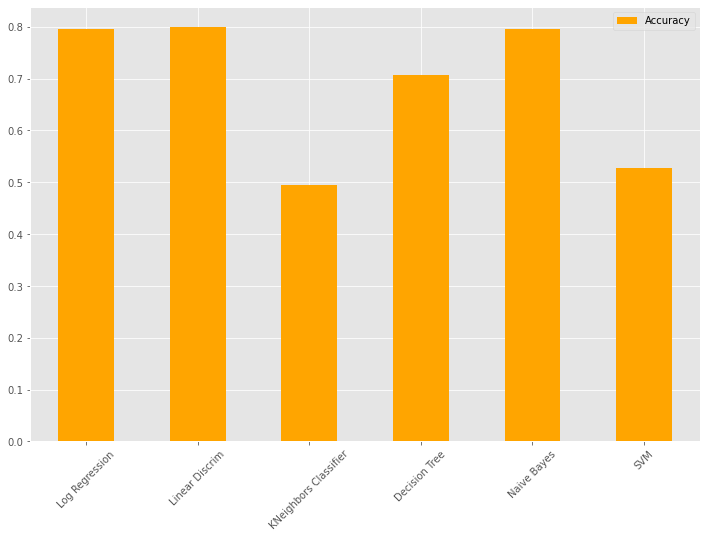

In [87]:
ax = finaldf.plot.bar(rot=45, color = 'orange')